In [1]:
!pip install pandas_datareader

     |████████████████████████████████| 107 kB 2.2 MB/s eta 0:00:01


In [2]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 作成したグラフを表示

In [3]:
start = '2019-06-01'
end = '2020-06-01'

df = data.DataReader('^N225','yahoo',start,end)
# 所得したいティッカーシンボル、データソースの名前、期間

In [4]:
df.head(10)
# volumeは株取引された量。出来高は株価に先行する。
# Adj　Closeは調整後の終値

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400,20410.880859
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200,20408.539062
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300,20776.099609
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600,20774.039062
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700,20884.710938
2019-06-10,21166.119141,21077.949219,21095.400391,21134.419922,58200,21134.419922
2019-06-11,21227.179688,21066.619141,21099.539062,21204.279297,52100,21204.279297
2019-06-12,21259.699219,21118.750000,21130.390625,21129.720703,56500,21129.720703
2019-06-13,21111.230469,20932.130859,21040.910156,21032.000000,65700,21032.000000


In [5]:
df.index
# 時系列データとして扱える

DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14',
               ...
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01'],
              dtype='datetime64[ns]', name='Date', length=242, freq=None)

In [6]:
date=df.index
price=df['Adj Close']

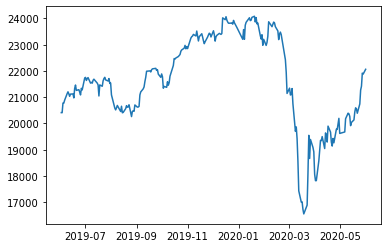

In [7]:
# グラフを表示
plt.plot(date,price)

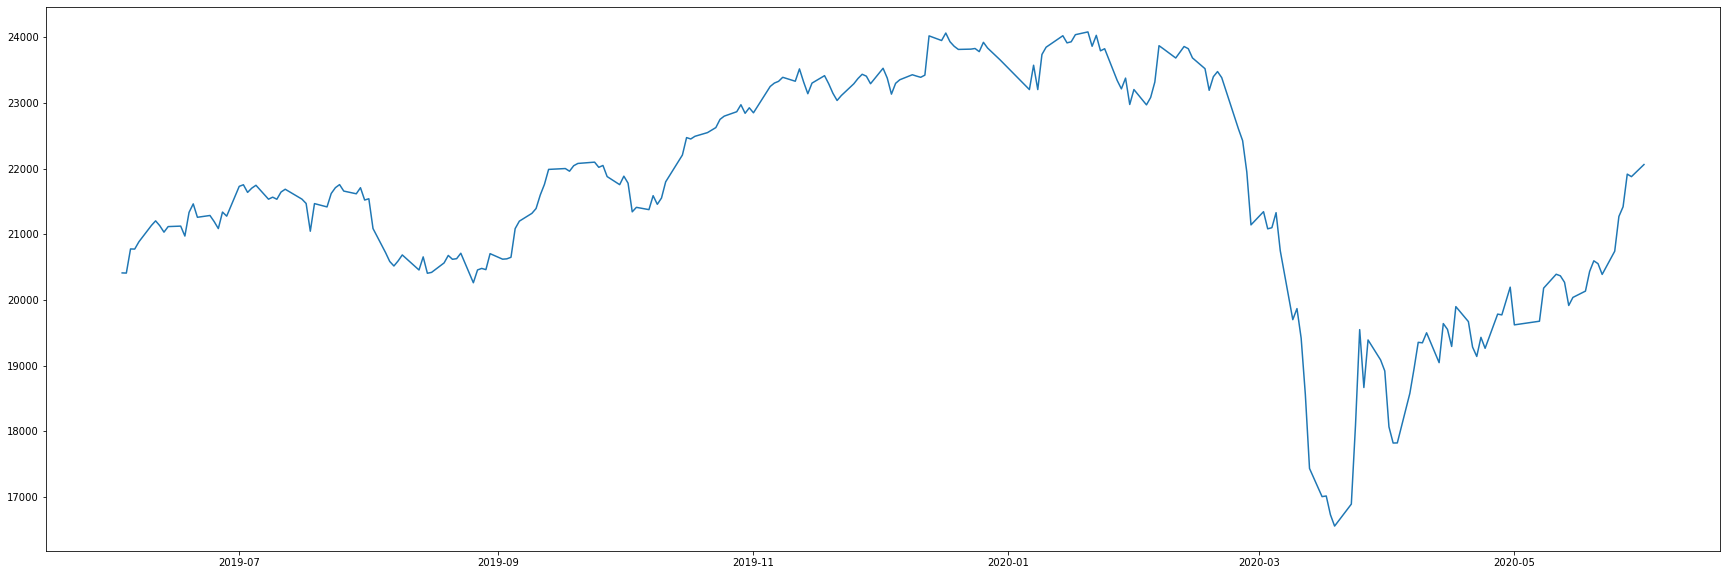

In [8]:
# グラフを大きくする
plt.figure(figsize=(30,10))
# 30が横、10が縦
plt.plot(date,price)

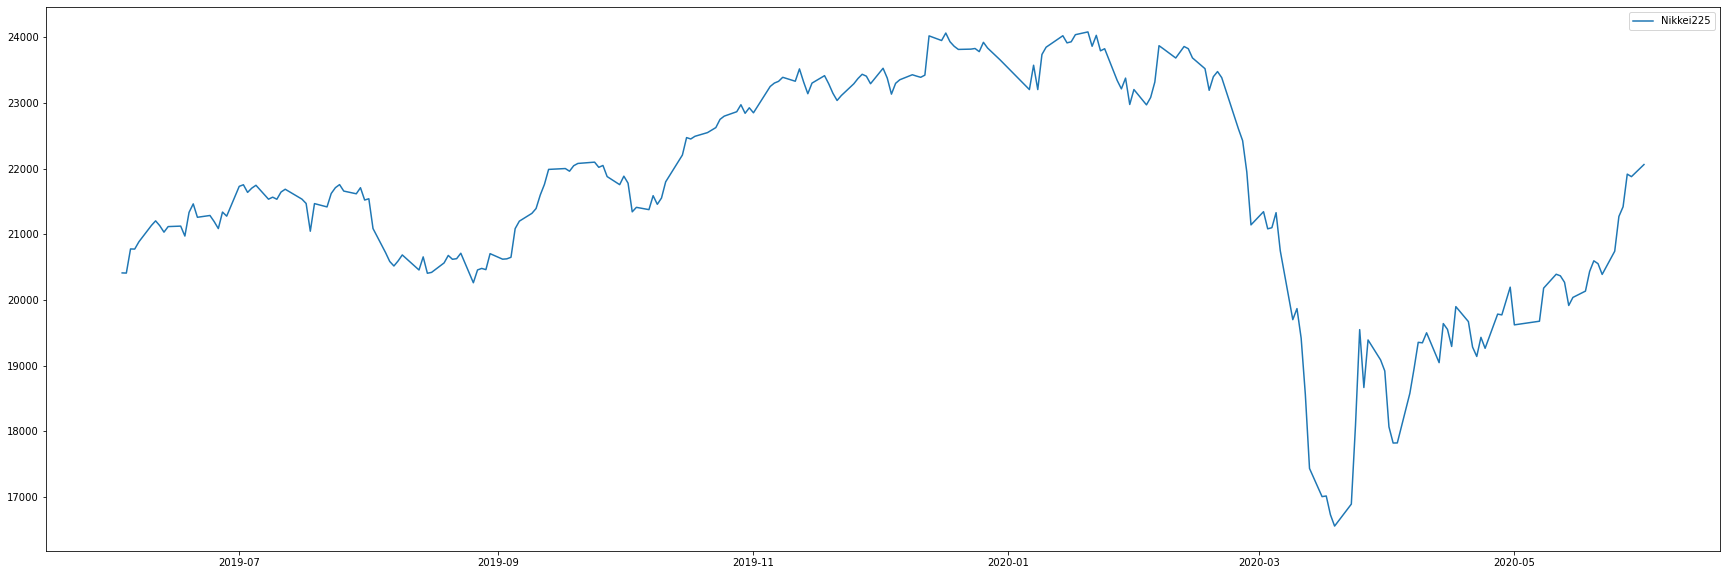

In [10]:
# 線グラフに名前をつける
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.legend()
# labelを表示させるlegend

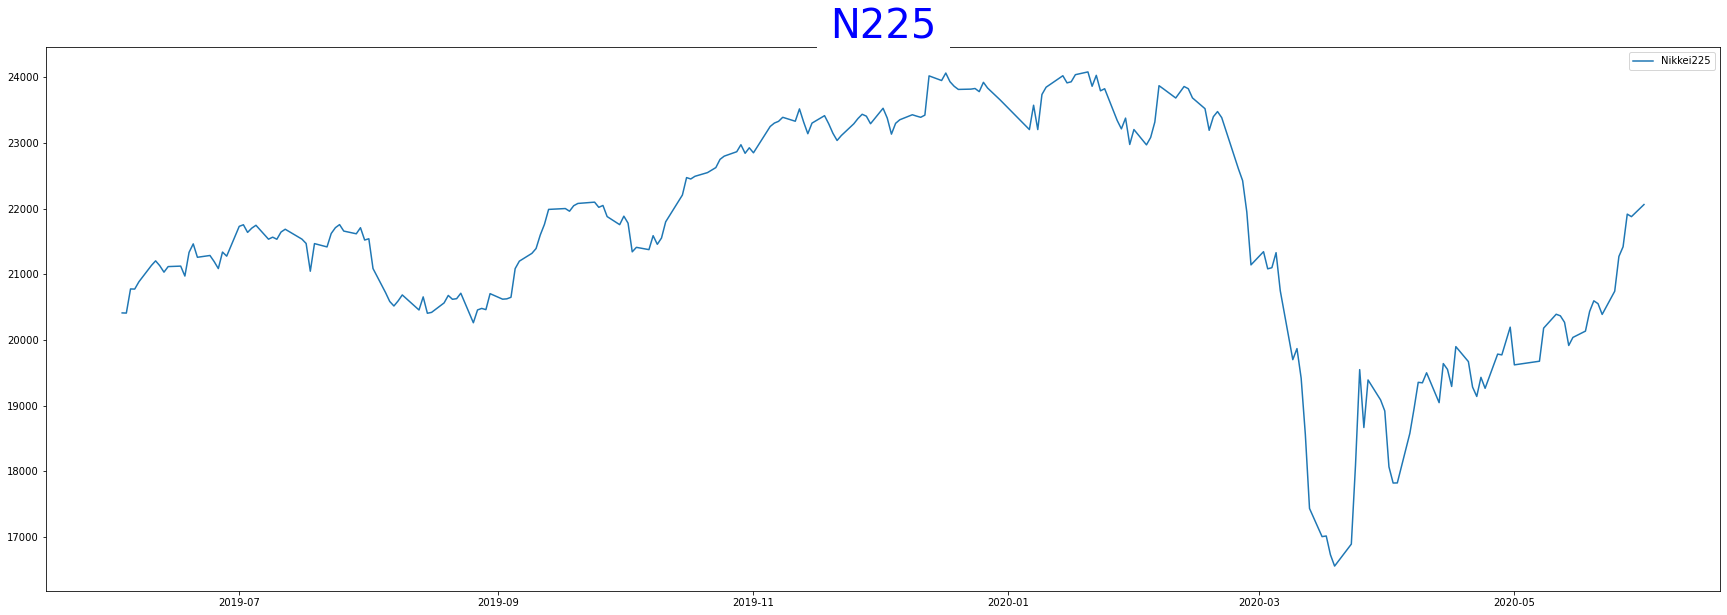

In [11]:
# titleをつける
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.title('N225',color='blue',backgroundcolor='white',size=40,loc='center')
plt.legend()

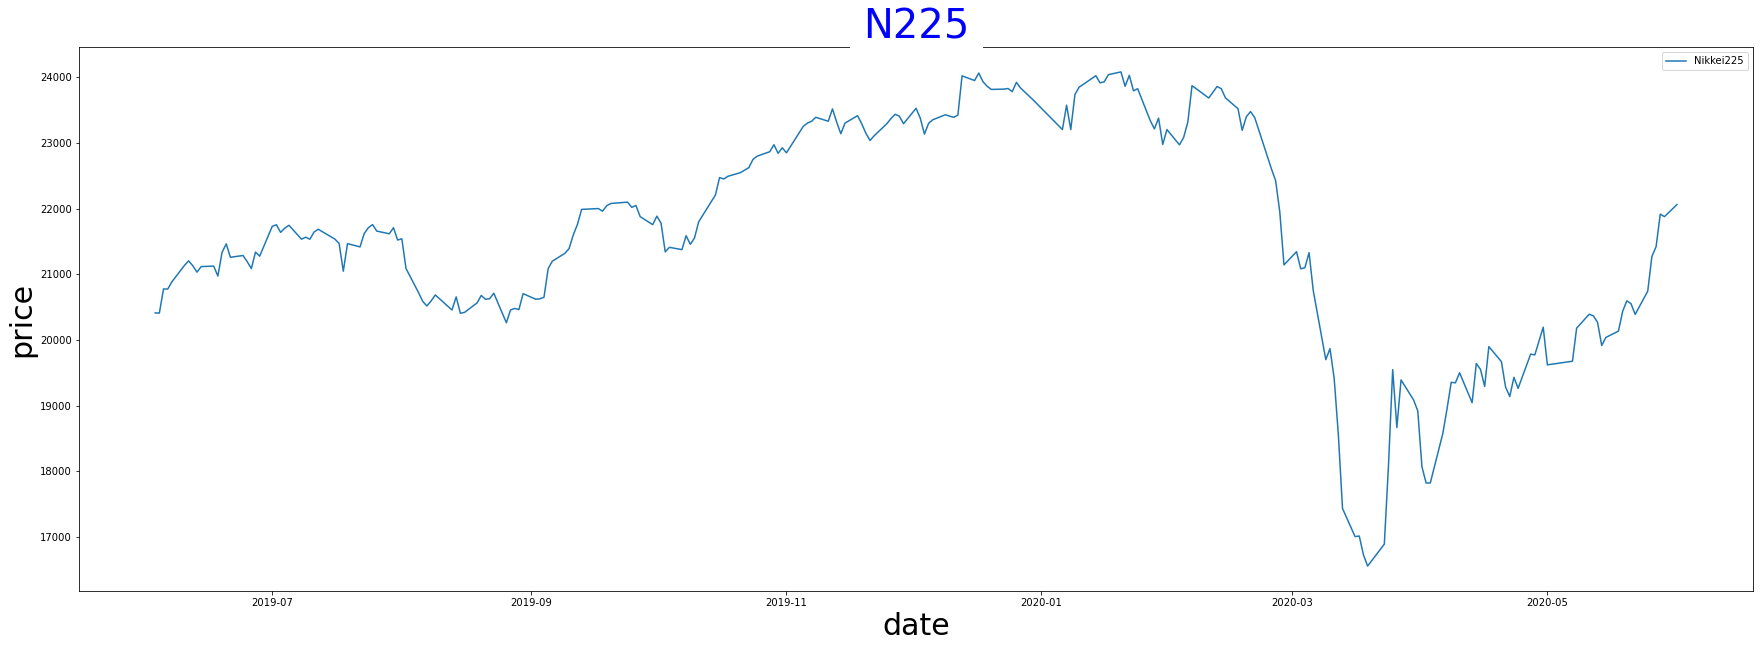

In [12]:
# 軸名をつける
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.title('N225',color='blue',backgroundcolor='white',size=40,loc='center')
plt.xlabel('date',color='black',size=30)
plt.ylabel('price',color='black',size=30)
plt.legend()

In [13]:
# 過去を用いる単純移動平均という指標を追加。その他、その日付に近い日付を用いる加重移動平均や指数平滑移動平均などがある。
span01=5
span02=25
span03=50

df['sma01'] = price.rolling(window=span01).mean()
df['sma02'] = price.rolling(window=span02).mean()
df['sma03'] = price.rolling(window=span03).mean()
# meanは平均

In [15]:
pd.set_option('display.max_rows',None)
# 省略させないコード
df.head(100)

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03
Date,,,,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400,20410.880859,NaN,NaN,NaN
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200,20408.539062,NaN,NaN,NaN
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300,20776.099609,NaN,NaN,NaN
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600,20774.039062,NaN,NaN,NaN
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700,20884.710938,20650.853906,NaN,NaN
2019-06-10,21166.119141,21077.949219,21095.400391,21134.419922,58200,21134.419922,20795.561719,NaN,NaN
2019-06-11,21227.179688,21066.619141,21099.539062,21204.279297,52100,21204.279297,20954.709766,NaN,NaN
2019-06-12,21259.699219,21118.750000,21130.390625,21129.720703,56500,21129.720703,21025.433984,NaN,NaN
2019-06-13,21111.230469,20932.130859,21040.910156,21032.000000,65700,21032.000000,21077.026172,NaN,NaN


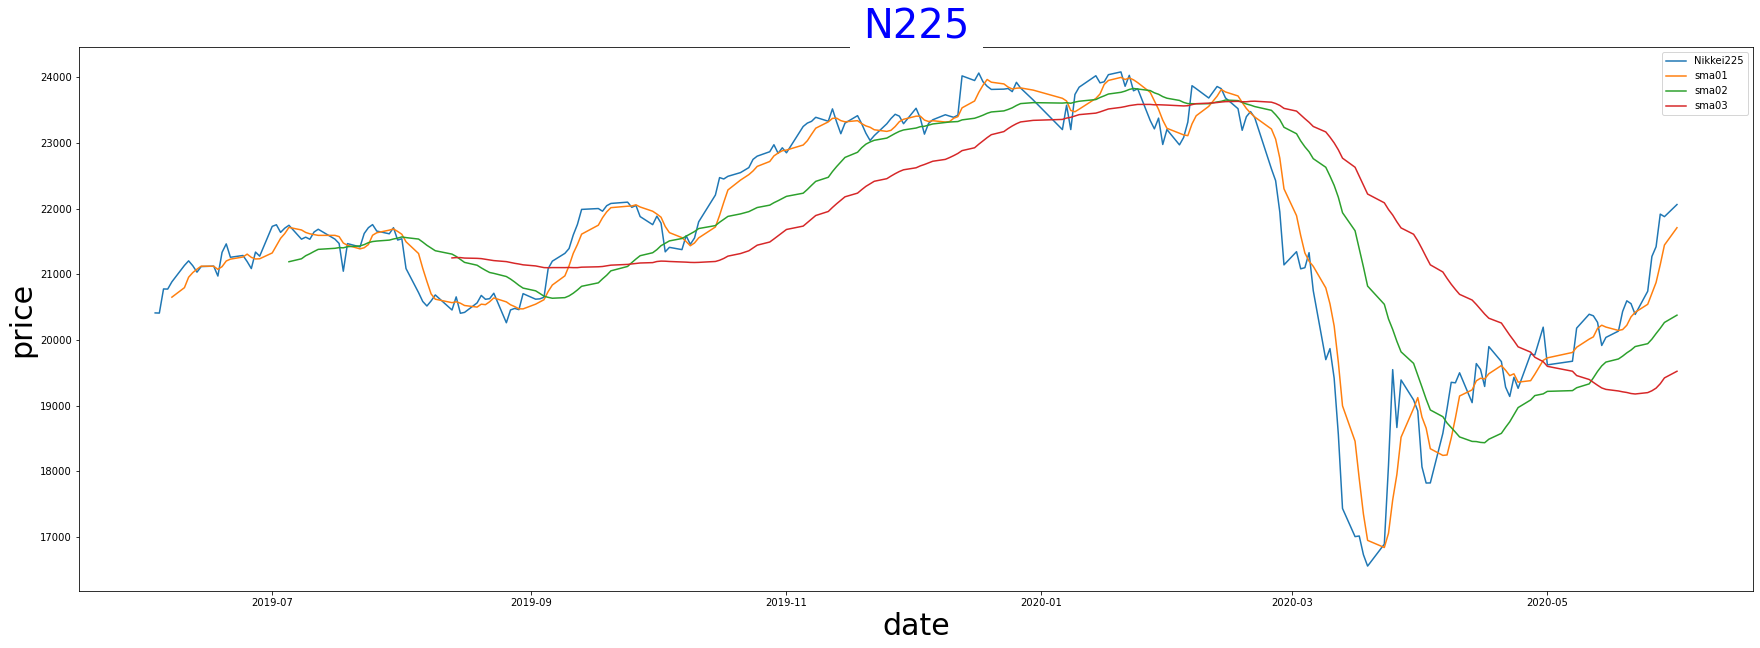

In [16]:
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.plot(date,df['sma01'],label='sma01')
plt.plot(date,df['sma02'],label='sma02')
plt.plot(date,df['sma03'],label='sma03')



plt.title('N225',color='blue',backgroundcolor='white',size=40,loc='center')
plt.xlabel('date',color='black',size=30)
plt.ylabel('price',color='black',size=30)
plt.legend()

In [ ]:
# 配色の参考サイト
# https://colorhunt.co/palette/184189

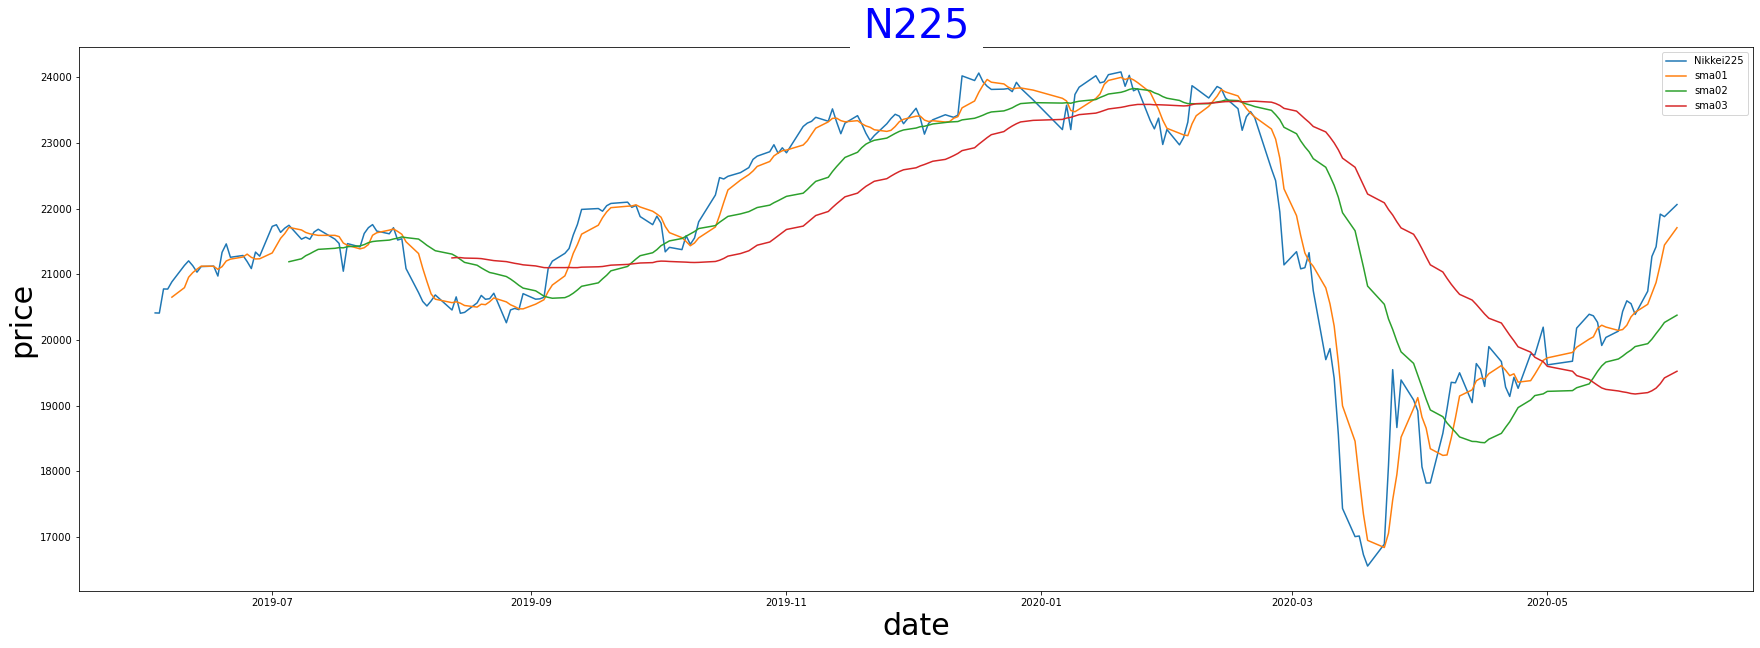

In [17]:
# rgbで色を設定
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.plot(date,df['sma01'],label='sma01')
plt.plot(date,df['sma02'],label='sma02')
plt.plot(date,df['sma03'],label='sma03')



plt.title('N225',color='blue',backgroundcolor='white',size=40,loc='center')
plt.xlabel('date',color='black',size=30)
plt.ylabel('price',color='black',size=30)
plt.legend()

In [ ]:
# 本題、いつ売っていつ買えばよかったか？
# ゴールデンクロス、短期の移動平均線が中期以上の移動平均線を下から上に抜けること。価格が上昇しているサイン。このタイミングで買って、上昇後に売ると儲かる。
# デッドクロス、ゴールデンクロスの逆。例）コロナウイルスの影響。３０％近く下落。空売りで儲ける。

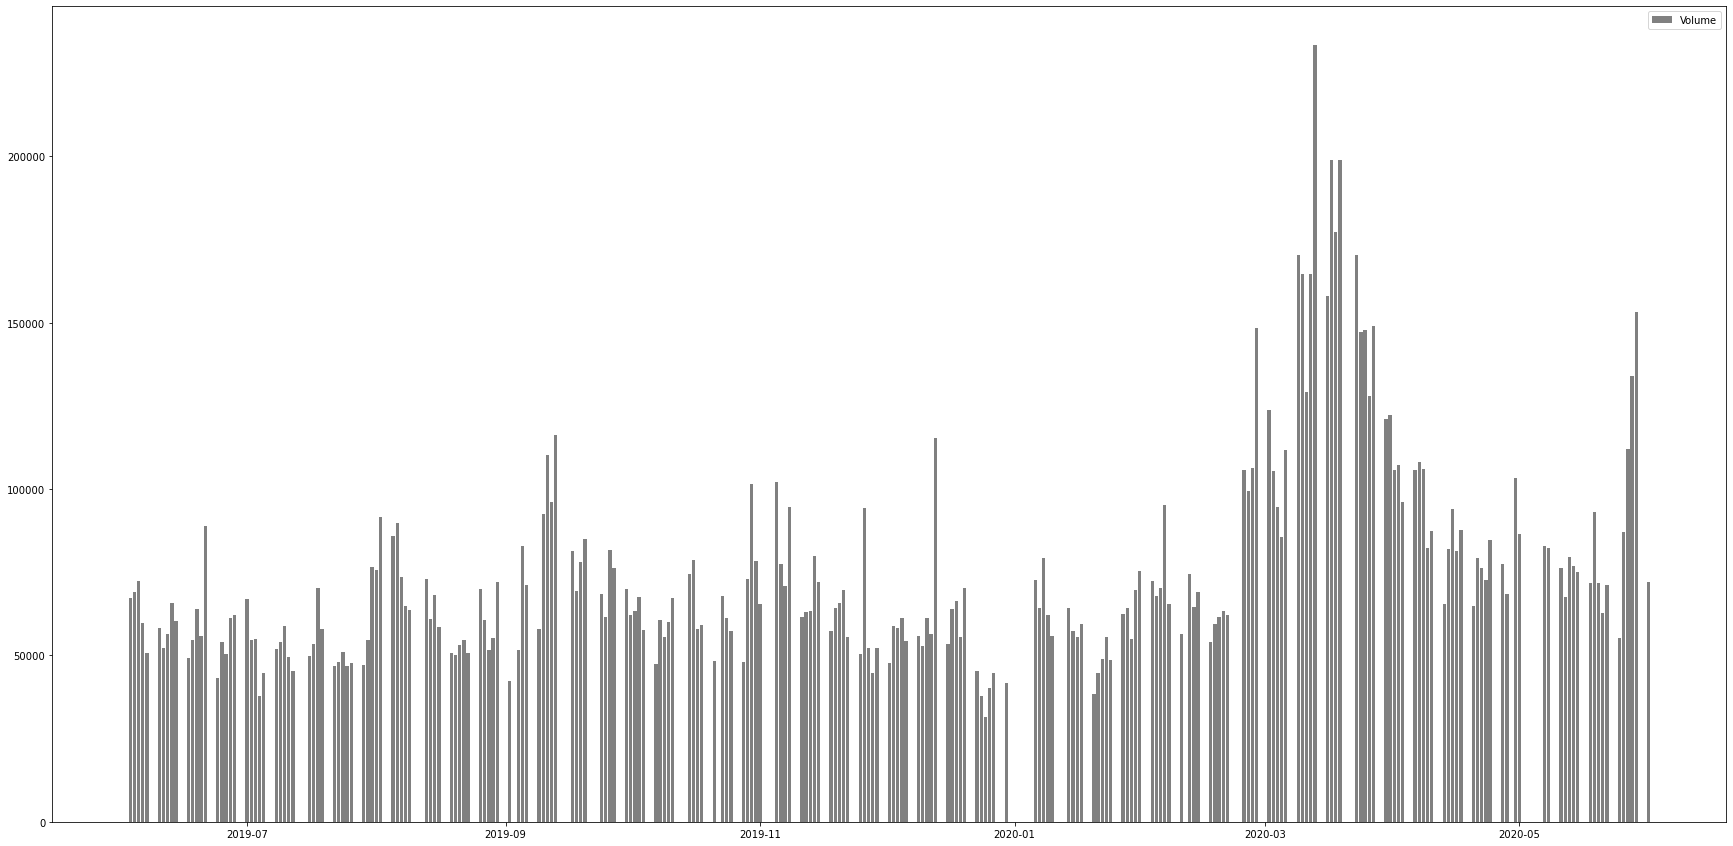

In [18]:
# 棒グラフを作る。出来高を見るため。
plt.figure(figsize=(30,15))
plt.bar(date,df['Volume'],label='Volume',color='grey')

plt.legend()

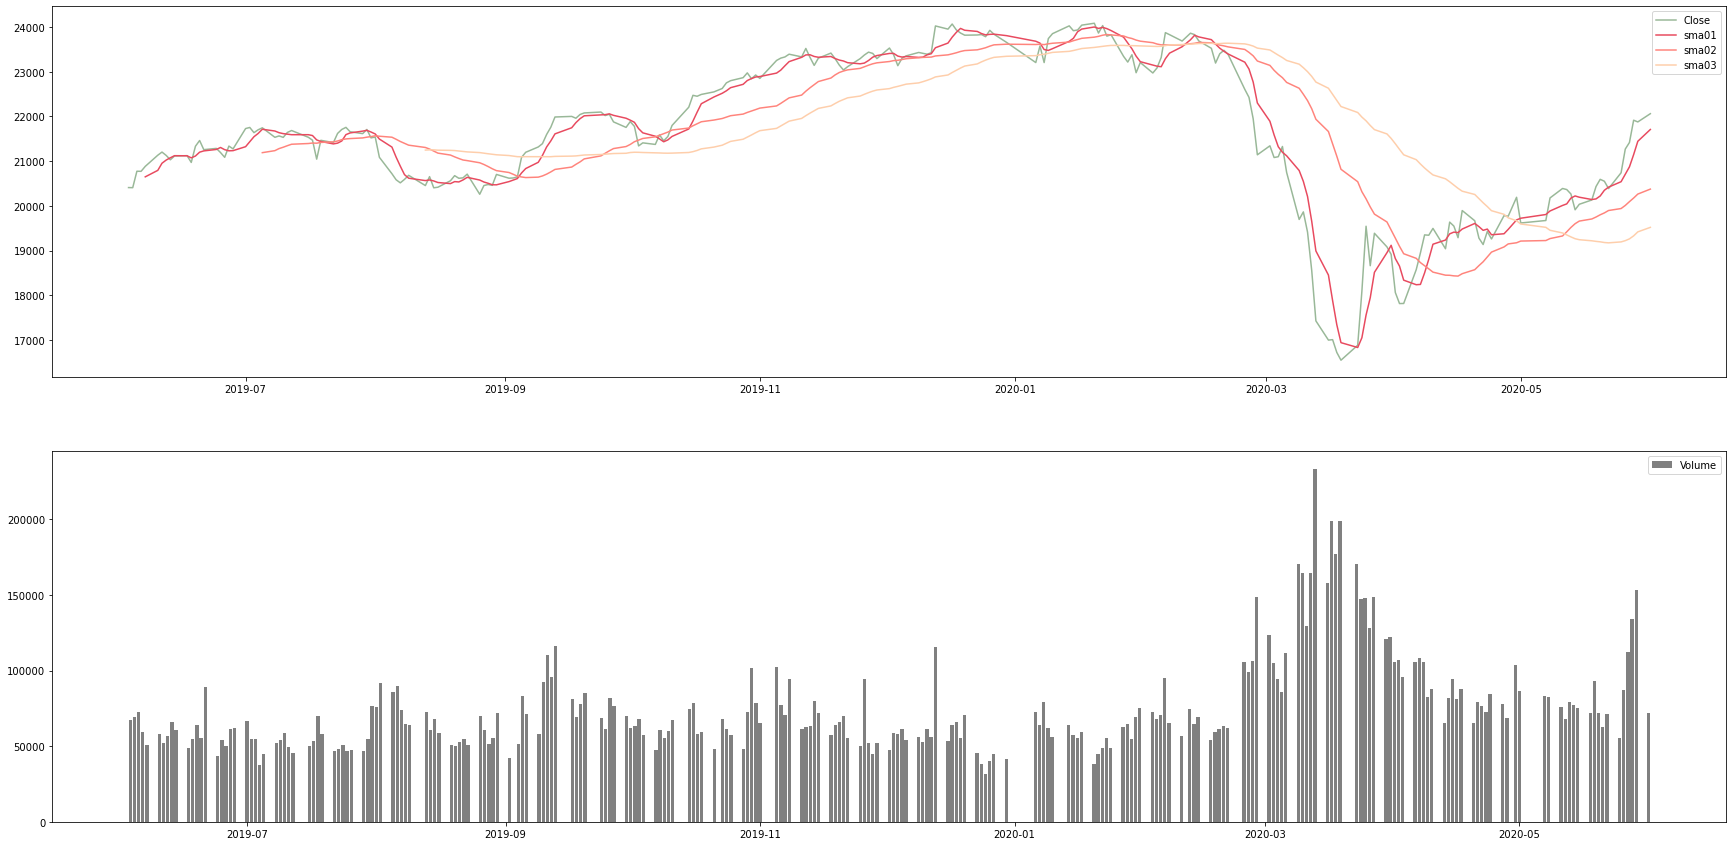

In [19]:
# 線グラフと棒グラフを同じグラフ内で２分割して表示
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,price,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
# 縦に２列、横に１列、配置番号は２
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

In [20]:
# 日本企業の個別銘柄の株のデータ所得、東京証券取引所のサイト
# リクルートホールディングス
df = data.DataReader('6098.JP','stooq')
# データソースはポーランドのサイトstooq

In [21]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-25,4200.0,4203.0,4151.0,4187.0,1269500
2020-12-24,4250.0,4252.0,4196.0,4220.0,2540600
2020-12-23,4205.0,4222.0,4150.0,4204.0,3747300
2020-12-22,4173.0,4176.0,4109.0,4135.0,2982000
2020-12-21,4200.0,4205.0,4124.0,4156.0,3182600


In [22]:
df.index.min()

Timestamp('2016-01-04 00:00:00')

In [23]:
df.index.max()

Timestamp('2020-12-25 00:00:00')

In [24]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-08,1146.53,1172.72,1146.53,1148.16,7270659
2016-01-07,1154.72,1166.18,1151.43,1153.06,5058659
2016-01-06,1179.27,1185.83,1151.43,1154.72,6971798
2016-01-05,1146.53,1180.91,1146.53,1172.72,7085664
2016-01-04,1169.44,1174.36,1148.16,1149.80,2582600


In [25]:
# headもtailも並び替えをする。
df = df.sort_index()
# 通常の並び替えはindexではなく、values

In [26]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,1169.44,1174.36,1148.16,1149.80,2582600
2016-01-05,1146.53,1180.91,1146.53,1172.72,7085664
2016-01-06,1179.27,1185.83,1151.43,1154.72,6971798
2016-01-07,1154.72,1166.18,1151.43,1153.06,5058659
2016-01-08,1146.53,1172.72,1146.53,1148.16,7270659
2016-01-12,1146.53,1157.98,1117.04,1117.04,5924410
2016-01-13,1125.22,1162.90,1125.22,1156.35,5226559
2016-01-14,1133.41,1151.43,1118.67,1139.96,6674463
2016-01-15,1156.35,1167.81,1139.96,1149.80,4940214


In [27]:
df.index>='2019-06-01 00:00:00'

array([False, False, False, ...,  True,  True,  True])

In [29]:
df[df.index>='2019-06-01 00:00:00']

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-03,3412.41,3463.92,3394.58,3463.92,3484466
2019-06-04,3456.00,3456.00,3259.86,3263.82,7004164
2019-06-05,3320.28,3393.58,3309.39,3393.58,5062595
2019-06-06,3364.87,3381.70,3330.20,3339.11,4983547
2019-06-07,3371.79,3381.70,3318.30,3342.08,2580413
2019-06-10,3385.66,3459.96,3374.77,3446.09,4300082
2019-06-11,3427.27,3463.92,3405.48,3457.98,2505200
2019-06-12,3468.87,3518.40,3423.31,3426.27,4274540
2019-06-13,3390.62,3482.73,3388.64,3445.10,3202397


In [31]:
df[df.index<='2020-05-01 00:00:00']

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,1169.44,1174.36,1148.16,1149.80,2582600
2016-01-05,1146.53,1180.91,1146.53,1172.72,7085664
2016-01-06,1179.27,1185.83,1151.43,1154.72,6971798
2016-01-07,1154.72,1166.18,1151.43,1153.06,5058659
2016-01-08,1146.53,1172.72,1146.53,1148.16,7270659
2016-01-12,1146.53,1157.98,1117.04,1117.04,5924410
2016-01-13,1125.22,1162.90,1125.22,1156.35,5226559
2016-01-14,1133.41,1151.43,1118.67,1139.96,6674463
2016-01-15,1156.35,1167.81,1139.96,1149.80,4940214


In [34]:
df[(df.index>='2019-06-01 00:00:00') & (df.index<='2020-05-01 00:00:00')]

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-03,3412.41,3463.92,3394.58,3463.92,3484466
2019-06-04,3456.00,3456.00,3259.86,3263.82,7004164
2019-06-05,3320.28,3393.58,3309.39,3393.58,5062595
2019-06-06,3364.87,3381.70,3330.20,3339.11,4983547
2019-06-07,3371.79,3381.70,3318.30,3342.08,2580413
2019-06-10,3385.66,3459.96,3374.77,3446.09,4300082
2019-06-11,3427.27,3463.92,3405.48,3457.98,2505200
2019-06-12,3468.87,3518.40,3423.31,3426.27,4274540
2019-06-13,3390.62,3482.73,3388.64,3445.10,3202397


In [35]:
df = df[(df.index>='2019-06-01 00:00:00') & (df.index<='2020-05-01 00:00:00')] 

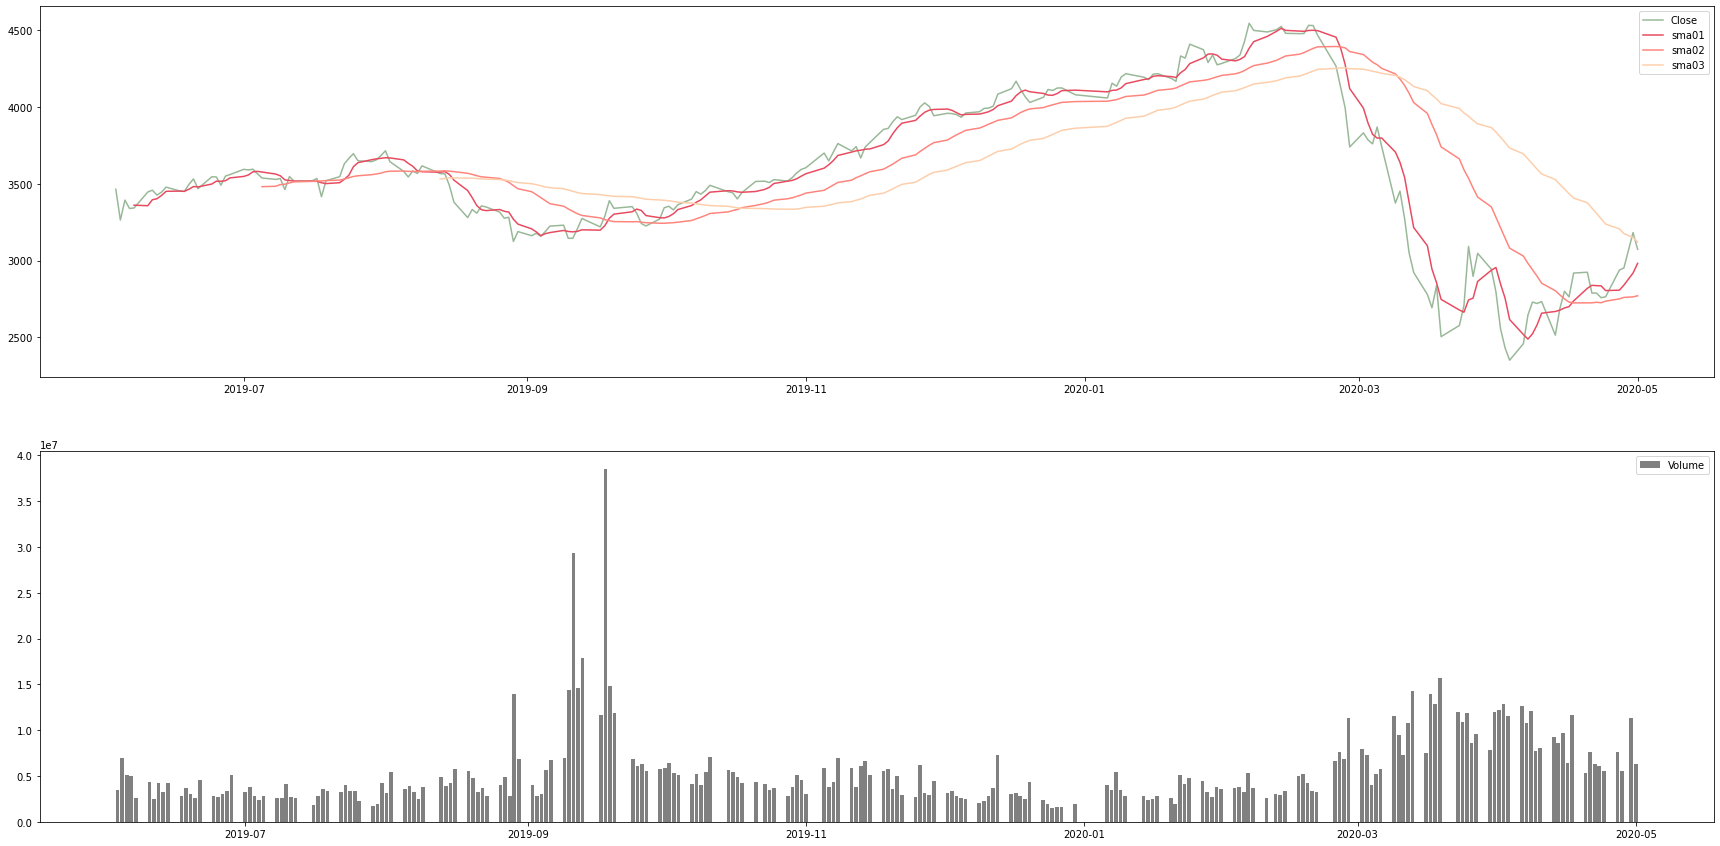

In [36]:
date=df.index
price=df['Close']

span01=5
span02=25
span03=50

df['sma01'] = price.rolling(window=span01).mean()
df['sma02'] = price.rolling(window=span02).mean()
df['sma03'] = price.rolling(window=span03).mean()

plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,price,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

In [39]:
# ユニクロやGUなどがグループ会社のファーストリテイリング
start = '2019-06-01'
end = '2020-05-01'
company_code = '6502.JP'

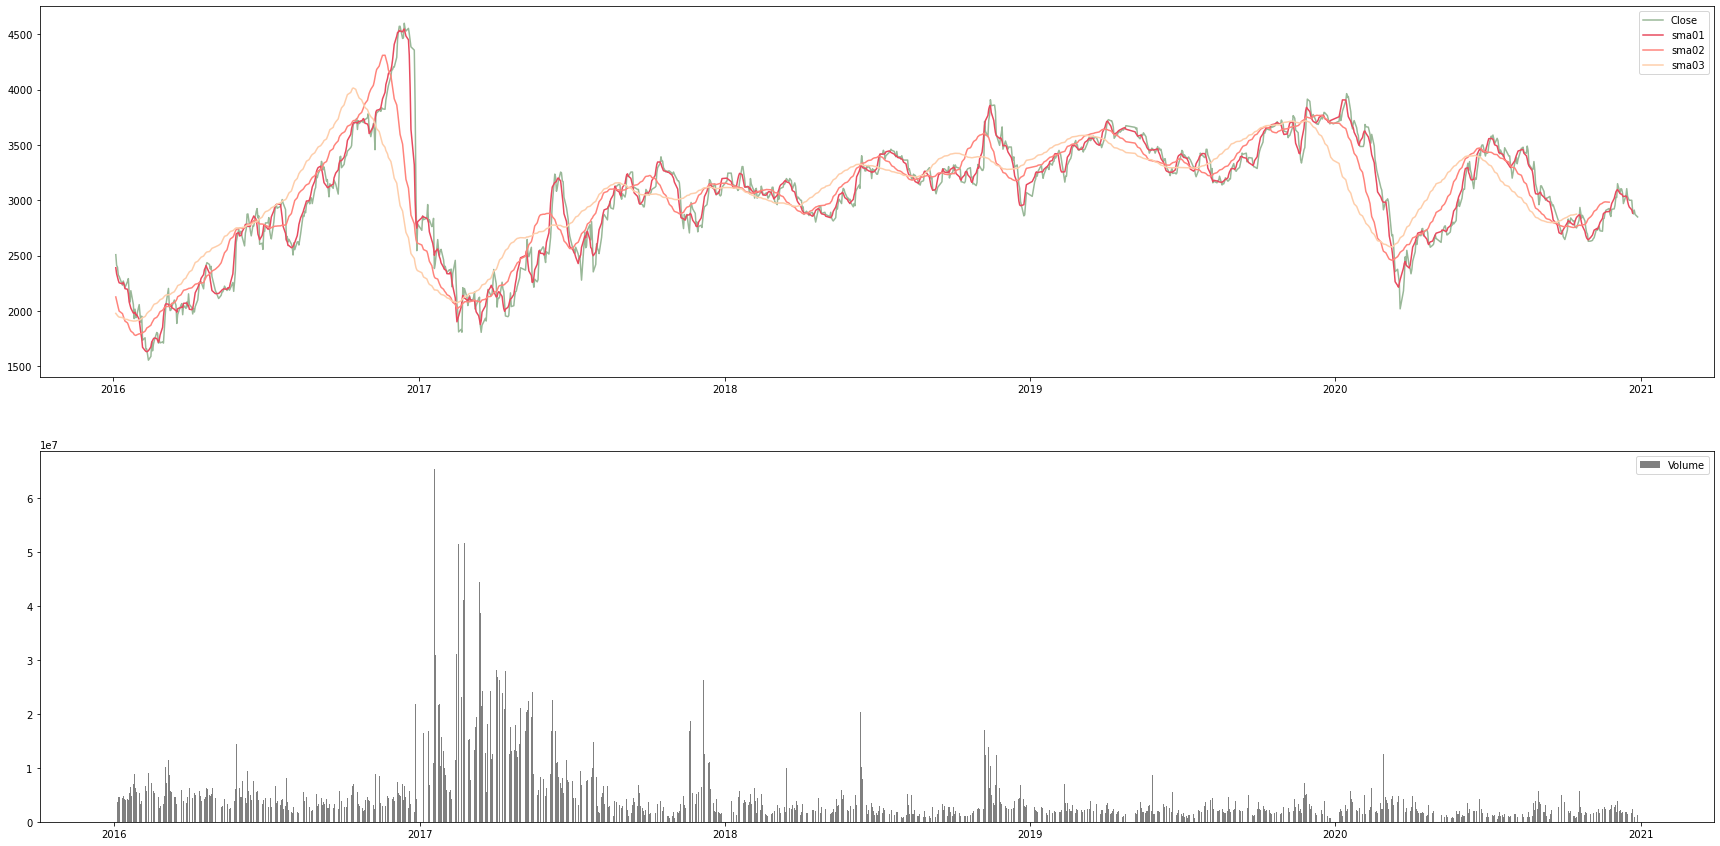

In [41]:
df = df[(df.index>=start) & (df.index<=end)] 
df = data.DataReader(company_code,'stooq')

date=df.index
price=df['Close']

span01=5
span02=25
span03=50

df['sma01'] = price.rolling(window=span01).mean()
df['sma02'] = price.rolling(window=span02).mean()
df['sma03'] = price.rolling(window=span03).mean()

plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,price,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

In [42]:
# 同じ記述は関数化
def company_stock(start,end,company_code):
    df = data.DataReader(company_code,'stooq')
    df = df[(df.index>=start) & (df.index<=end)] 


    date=df.index
    price=df['Close']

    span01=5
    span02=25
    span03=50

    df['sma01'] = price.rolling(window=span01).mean()
    df['sma02'] = price.rolling(window=span02).mean()
    df['sma03'] = price.rolling(window=span03).mean()

    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)

    plt.plot(date,price,label='Close',color='#99b898')
    plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
    plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
    plt.plot(date,df['sma03'],label='sma03',color='#feceab')
    plt.legend()

    plt.subplot(2,1,2)
    plt.bar(date,df['Volume'],label='Volume',color='grey')
    plt.legend()

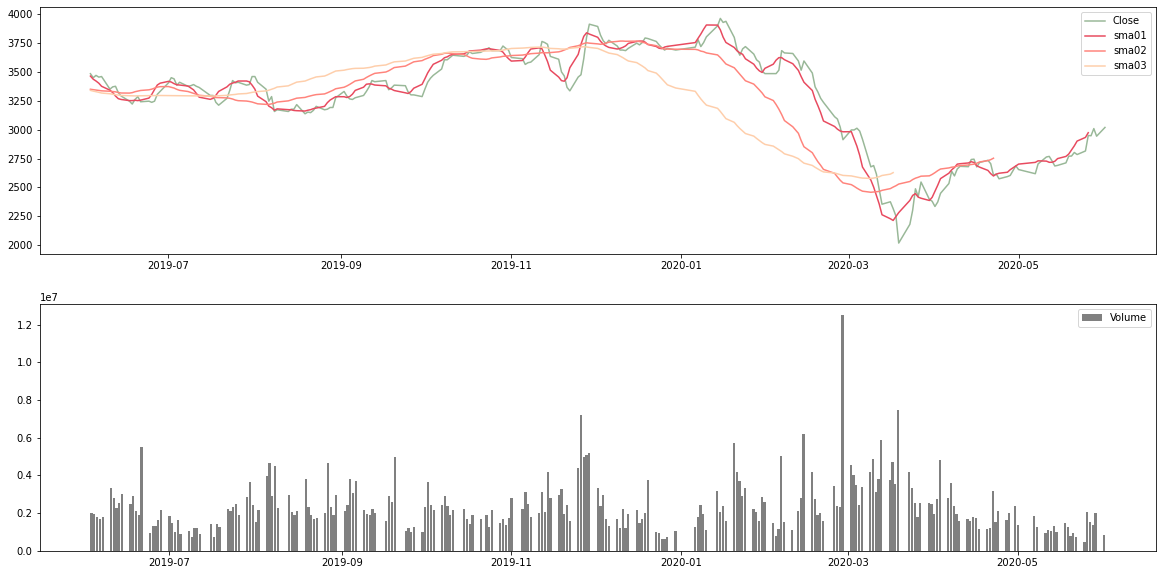

In [43]:
company_stock('2019-06-01','2020-06-01','6502.jp')

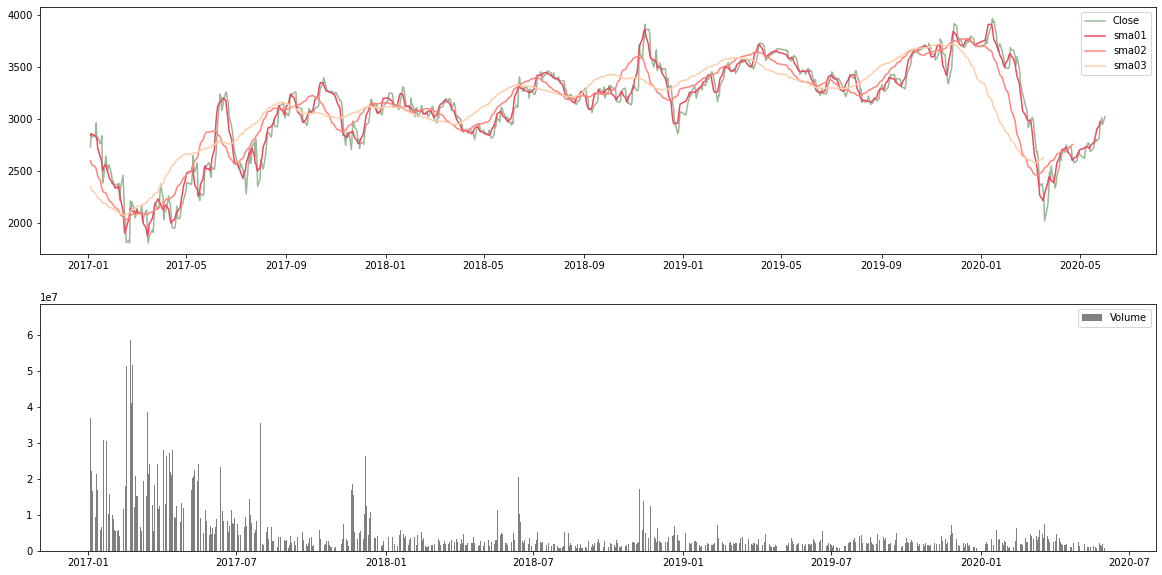

In [44]:
company_stock('2017-01-01','2020-06-01','6502.jp')

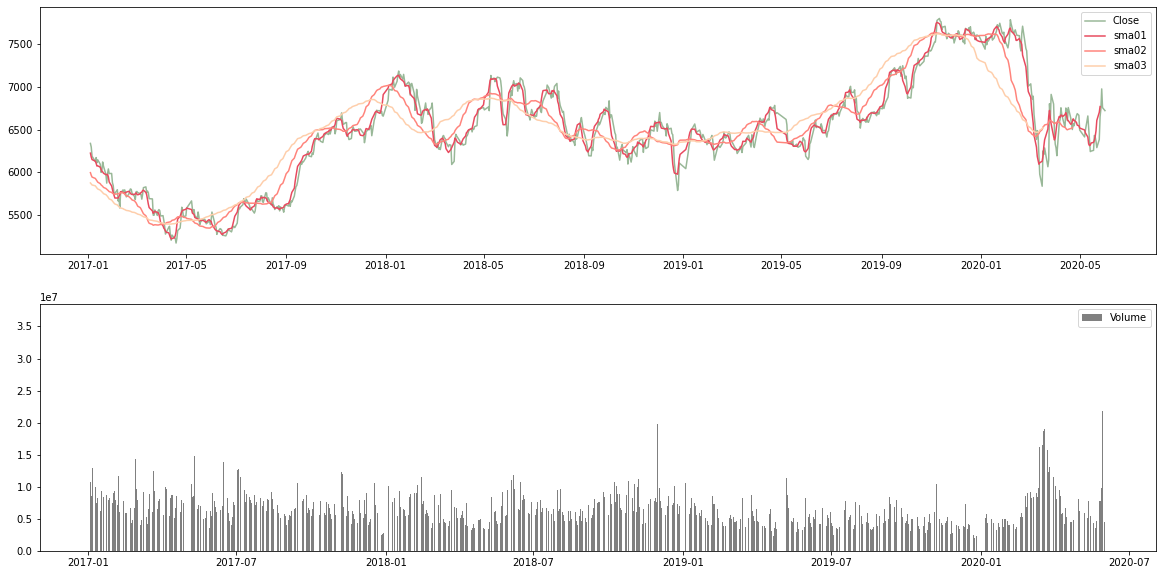

In [45]:
company_stock('2017-01-01','2020-06-01','7203.jp')

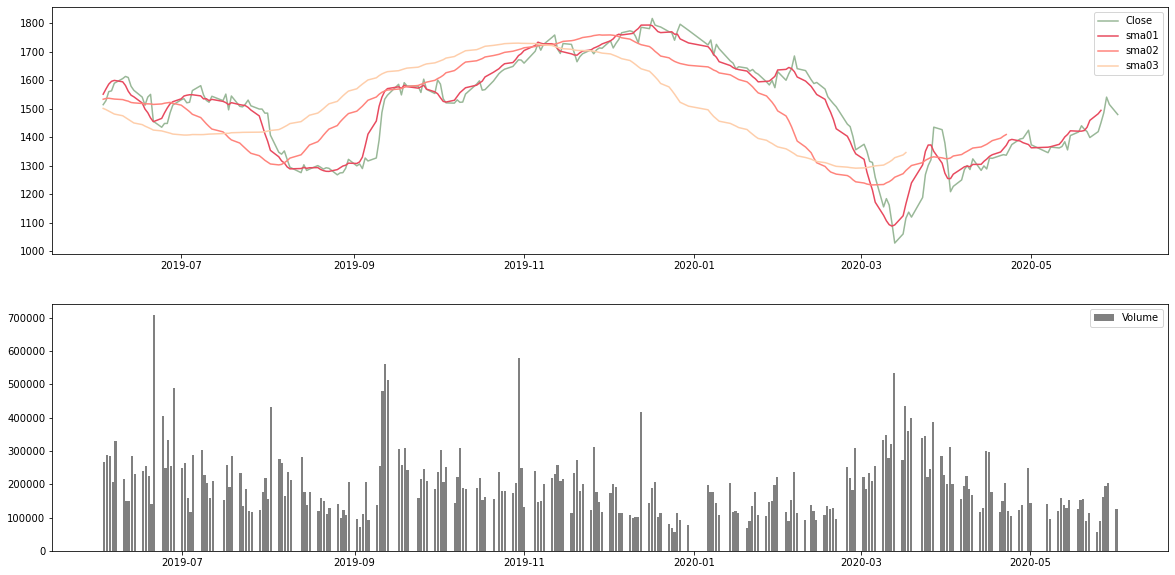

In [46]:
company_stock('2019-06-01','2020-06-01','8341.jp')